In [81]:
%reload_ext autoreload
%autoreload 2

import os
import pandas as pd

from helper_functions import *

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)


In [100]:
symbol = 'BTCAUD'

data = get_data(symbol=symbol)
data.shape

(1440, 11)

In [99]:
data.head()

,Open,High,Low,Close,Volume,Close Time,Quote Asset,Number of Trades,Taker buy base,Taker buy Quote,Ignore
Time,,,,,,,,,,,
2021-10-02 03:16:00,65968.67,65968.67,65968.67,65968.67,0.00000,1.633145e+12,0.000000,0,0.00000,0.000000,0.0
2021-10-02 03:17:00,65954.61,66003.00,65954.61,66003.00,0.06106,1.633145e+12,4030.033620,4,0.05906,3898.124400,0.0
2021-10-02 03:18:00,66001.38,66015.44,66001.38,66007.30,0.09096,1.633145e+12,6004.274713,3,0.03701,2443.231434,0.0
2021-10-02 03:19:00,66018.54,66063.48,66018.54,66040.98,0.18406,1.633145e+12,12157.981049,18,0.13932,9203.805403,0.0
2021-10-02 03:20:00,66040.98,66040.98,66040.98,66040.98,0.00000,1.633145e+12,0.000000,0,0.00000,0.000000,0.0


In [84]:
data.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Close Time          float64
Quote Asset         float64
Number of Trades      int64
Taker buy base      float64
Taker buy Quote     float64
Ignore              float64
dtype: object

array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>],
      dtype=object)

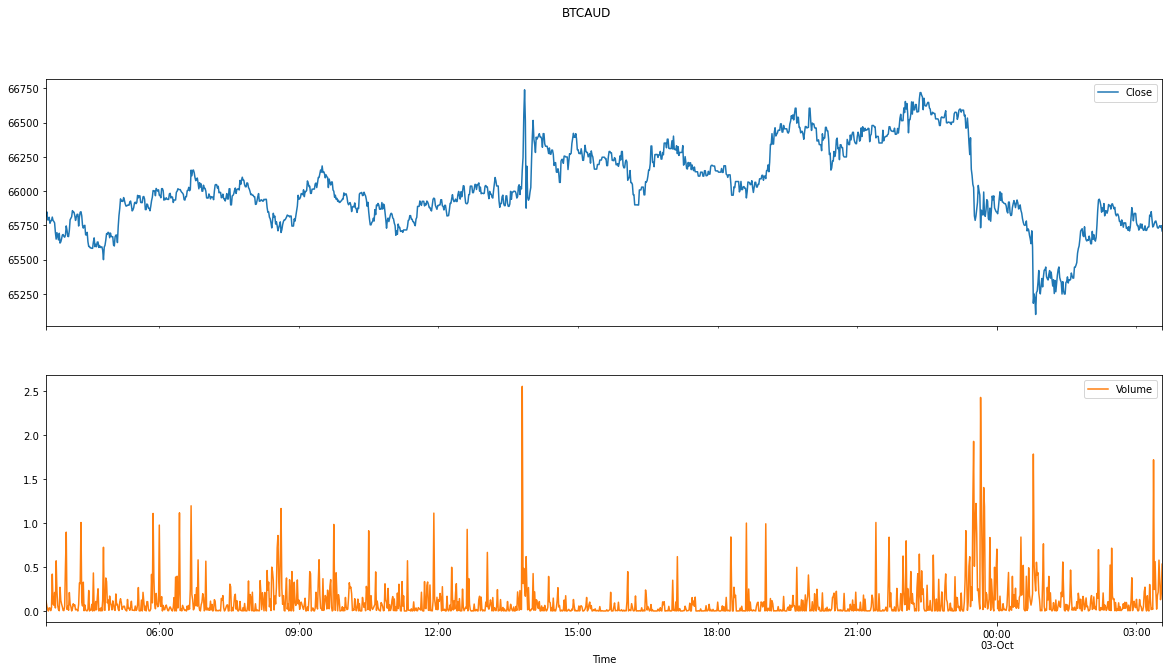

In [101]:
data[['Close','Volume']].plot(subplots=True, title='BTCAUD')


[autoreload of helper_functions failed: Traceback (most recent call last):
  File "/Users/kostyafarber/opt/miniconda3/envs/trading/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kostyafarber/opt/miniconda3/envs/trading/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/kostyafarber/opt/miniconda3/envs/trading/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/kostyafarber/opt/miniconda3/envs/trading/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/kostyafarber/repos/trading/notebooks/helper_functions.py", 

<AxesSubplot:xlabel='Time'>

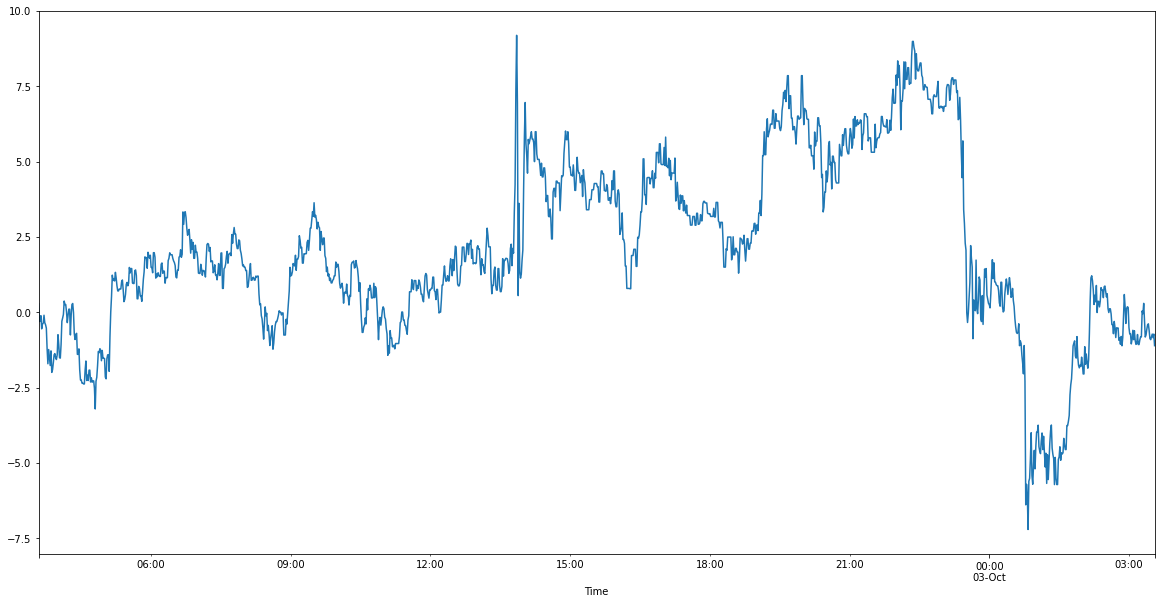

In [132]:
ret = (data['Close'].diff()/100).dropna().cumsum()
ret.plot()


In [130]:
cusum = getTEvents(ret, 0.05)
cusum[1]

Timestamp('2021-10-02 03:37:00')

<AxesSubplot:xlabel='Time'>

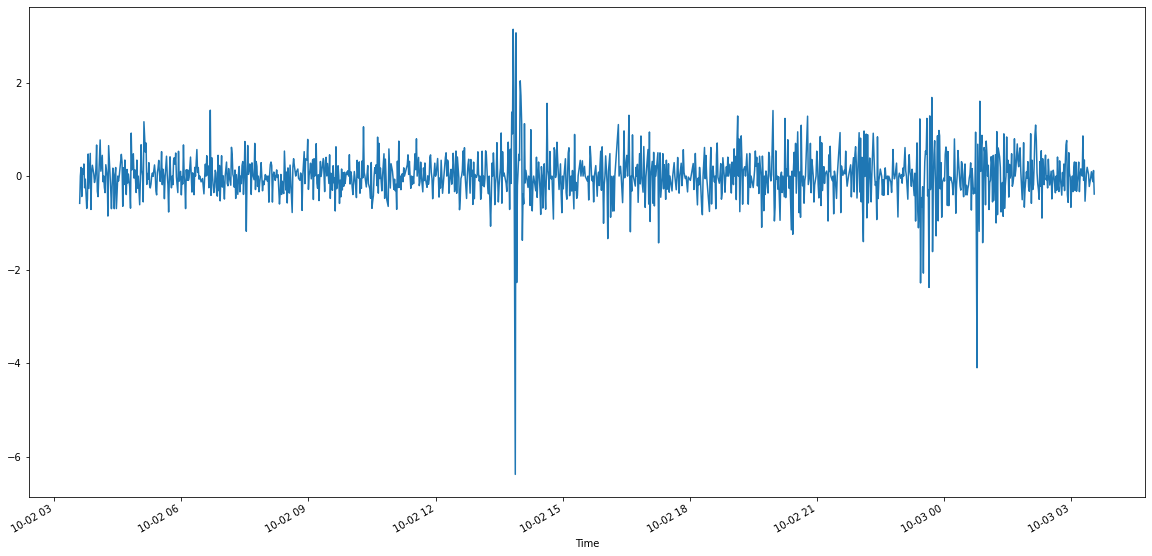

In [131]:
cusum_filter = ret[ret.index.isin(cusum)]
cusum_filter.plot(lines)

# CUSUM Filter

In [86]:
cusum_filter = pd.Series(getTEvents(data["Close"], 0.05))

<AxesSubplot:xlabel='Time'>

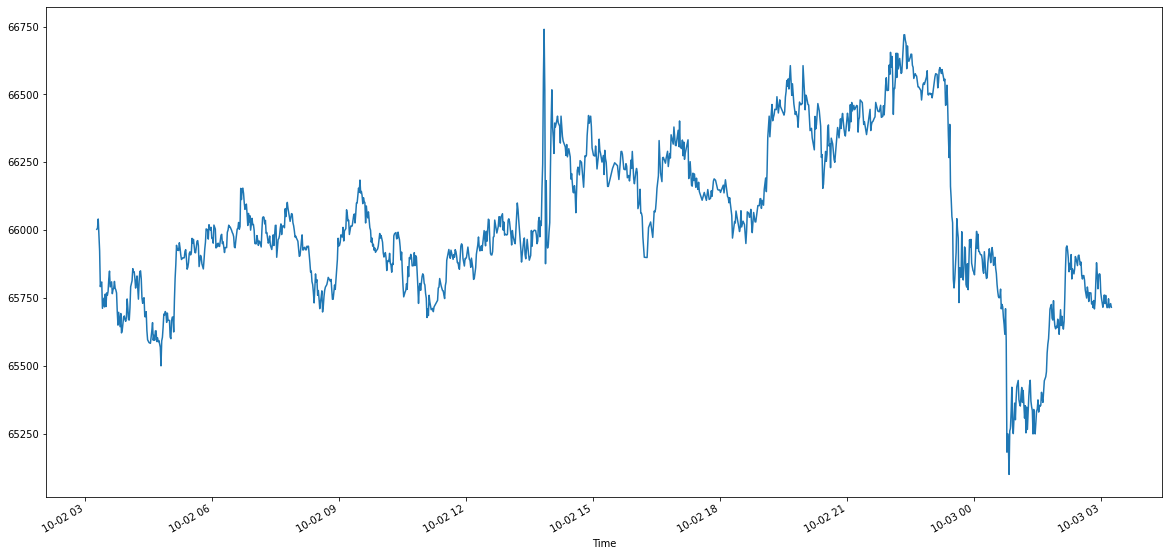

In [87]:
data_filtered = data[data.index.isin(cusum_filter)]
data_filtered["Close"].plot()

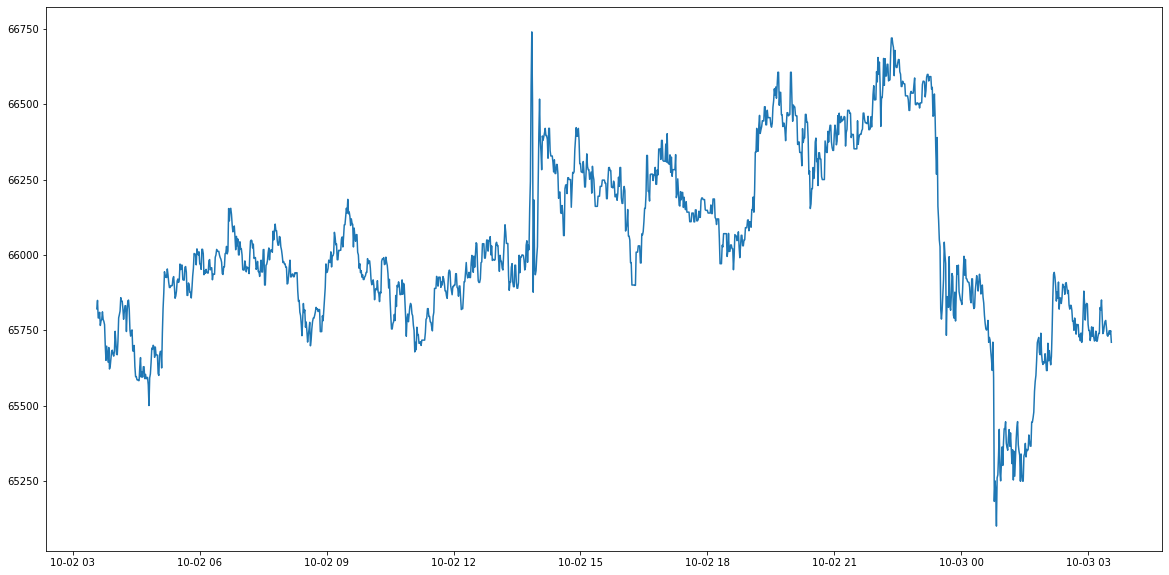

In [102]:
close = data["Close"]

fig, ax = plt.subplots()

ax.plot(close.index, close)